# Tensorflow practical on convolutions, part 1, image filters

This code sample gives an example of applying a 2D convolution in order to do image filtering.
1. First read and understand the code.
2. The current code applied box filter in order to achieve blurry effect. Try applying different filters (gaussian blur, sharpen filter, horizontal and vertical edge detectors and their combinations) for this image or any other image you like.
3. What filter can be used in order to compute the gradient of the image? Compute the gradient of the image using convolution with this filter in TensorFlow and also your own code, e.g. ``` grad_x[i,j] = img[i,j+1] - img[i,j]; grad_y[i,j] = img[i+1,j] - img[i,j]```. Make sure that your code gives identical results to the TensorFlow function you use.

In [199]:
import numpy as np
from PIL import Image
from scipy import misc
from skimage import data
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
import tensorflow as tf

%matplotlib inline

from __future__ import division
import matplotlib.image as mpimg

def normalize_filter(filt):
    norm = np.sum(filt.ravel())
    if (norm > 0):
        return filt / norm
    else:
        return filt

img = mpimg.imread('Data/General/image_0.png')
img_gray = rgb2gray(img).astype('float32')


# box filter (local average)
filt_box = np.ones((40, 40))
filt_box = normalize_filter(filt_box)

# gauss blur filter
filt_gauss_blur = np.array([[1, 4, 1],
                            [4, 4, 4],
                            [1, 4, 1]]) 

filt_gauss_blur = normalize_filter(filt_gauss_blur)

# sharpen filter
filt_sharpen = np.array([[0, -1, 0],
                         [-1, 5, -1],
                         [0, -1, 0]])

filt_sharpen = normalize_filter(filt_sharpen)

# edge detection (horizontal)
filt_edge_vert = np.array([[0,  0, 0],
                           [-1, 0, 1],
                           [0,  0, 0]])

filt_edge_vert = normalize_filter(filt_edge_vert)

# edge detection (vertical)
filt_edge_hor = np.array([[0,  1, 0],
                          [0,  0, 0],
                          [0, -1, 0]])

filt_edge_hor = normalize_filter(filt_edge_hor)

# edge detection (vertical+horizontal)
filt_edge = 0.5 * (filt_edge_vert + filt_edge_hor)


In [213]:
def tf_conv_2d(image, filt):
    # n_channels = 3
    # n_batch = 1
    
    # image, dimensions (height, width, n_channels)
    
    # image_batch, dimensions (n_batch, h, w, n_channels)
    image_batch = image[np.newaxis,:,:,np.newaxis]
    
    # filt, dimensions (filt_height, filt_width, n_input_channels, n_output_channels)
    # n_input_channels = 1
    # n_output_channels = 1
    filt = filt[:,:,np.newaxis,np.newaxis]

    conv_image = tf.nn.conv2d(input = image_batch, filter = filt, strides = [1, 1, 1, 1], padding = "SAME")
 
    with tf.Session() as sess:
        output_image = sess.run(conv_image)
        # output, dimensions (n_batch = 1, height, width, 1) 
        # one channel output (grayscale image)
        
        return output_image[0,:,:,0]

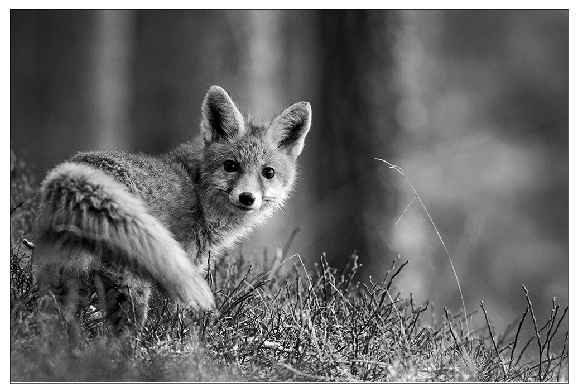

In [37]:
plt.figure(figsize=(12, 9), dpi=60)
imgplot = plt.imshow(img_gray, cmap = 'gray')

imgplot.axes.get_xaxis().set_visible(False)
imgplot.axes.get_yaxis().set_visible(False)

(670, 1000) (670, 1000)


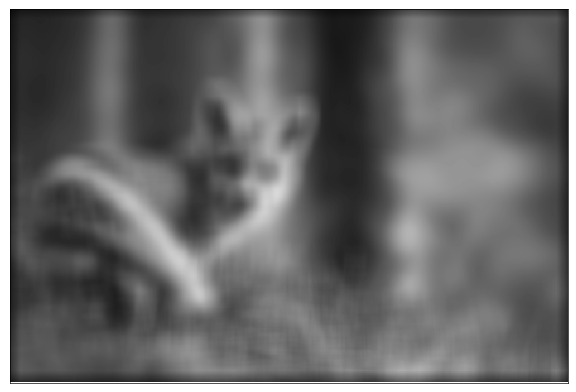

In [215]:
# apply the filter
image_filt = tf_conv_2d(img_gray, filt_box)

print(image_filt.shape, img_gray.shape)
# plot the result
plt.figure(figsize=(12, 9), dpi=60)
with tf.Session() as sess:
    image = image_filt
#     image = sess.run(image)
    
    imgplot = plt.imshow(image, cmap = 'gray', vmax=1.0, vmin=0.0)

    imgplot.axes.get_xaxis().set_visible(False)
    imgplot.axes.get_yaxis().set_visible(False)